In [1]:
import sys
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

sys.path.append("../src/models/")
sys.path.append("../src/")

from utils import utils

from PIL import Image
def count_frames_in_tiff(tiffpath):
    with Image.open(tiffpath) as tiff_img:
        nframes = tiff_img.n_frames
    return nframes


# Load test set

In [2]:
from srgan import MRCImageDataset
dataset = MRCImageDataset("/media/kyohei/forAI/split_images/",)

/home/kyohei/miniconda3/envs/cryoem/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:35: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/kyohei/miniconda3/envs/cryoem/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:93: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task

In [3]:
index = 2
# dataset[index]

In [4]:
dataset.file_list[2]

'/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713415_Data_18711474_18711476_20201219_063611_fractions__split2.mrc'

In [5]:
filename = dataset.file_list[2].split("/")[-1]
filename

'FoilHole_18713415_Data_18711474_18711476_20201219_063611_fractions__split2.mrc'

In [6]:
path_average_image = f"/media/kyohei/forAI/sumTIFF/10877/{filename.split('__')[0]}.tiff" 

In [7]:
path_average_image

'/media/kyohei/forAI/sumTIFF/10877/FoilHole_18713415_Data_18711474_18711476_20201219_063611_fractions.tiff'

In [8]:
data_in_HD_2023_0511 = pd.read_csv("data_in_HD_2023-0511.csv")

In [9]:
for f in data_in_HD_2023_0511.filename:
    if "FoilHole_18713415_Data_18711474_18711476_20201219_063611" in f:
        print(f)

FoilHole_18713415_Data_18711474_18711476_20201219_063611_fractions.tiff


In [10]:
filename

'FoilHole_18713415_Data_18711474_18711476_20201219_063611_fractions__split2.mrc'

In [11]:
original_n_frames = data_in_HD_2023_0511.query(f'filename=="{filename.split("__")[0]}.tiff"').nframes.item()
original_n_frames

59

In [12]:
count_frames_in_tiff(path_average_image)

1

In [13]:
with Image.open(path_average_image) as tiff_img:
    tiff_img.seek(0)
    summed_extracted_image = np.array(tiff_img.copy(), 
#                                dtype="float32"
                              )
    
averaged_extracted_image = summed_extracted_image / original_n_frames

In [14]:
extracted_image = summed_extracted_image

In [15]:
extracted_image.shape

(4092, 5760)

In [16]:
simple_process_image = utils.split_image(extracted_image)[index].astype("float32")

In [17]:
dd = dataset[index]

In [18]:
dd[0]

array([[ 8.131661 , 10.160398 , 13.17758  , ...,  8.181047 ,  6.9805923,
         5.3586144],
       [11.313968 ,  9.93011  ,  8.77338  , ...,  3.8302255,  9.42845  ,
        11.496999 ],
       [ 9.325102 , 10.182048 ,  5.914343 , ...,  9.823004 ,  7.7016053,
        14.477634 ],
       ...,
       [ 7.6698055,  8.967184 ,  9.595392 , ...,  7.072418 ,  7.2292404,
        12.715409 ],
       [15.423653 , 13.904879 ,  8.698524 , ...,  9.38949  ,  7.521955 ,
         9.013748 ],
       [12.504237 ,  9.380279 , 11.68256  , ...,  9.229852 ,  7.741467 ,
        12.476647 ]], dtype=float32)

# Show images of (short_motionCor, original_motionCor, just_average)

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, titles, num_rows, num_cols, imagemin=0, imagemax=40):
    from matplotlib.colors import Normalize
    assert len(images) == num_rows * num_cols, "Number of images should match num_rows * num_cols"

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))

    # If num_rows or num_cols is 1, axs is a 1-D array
    if num_rows == 1 or num_cols == 1:
        ax = ax.ravel()
    
    norm = Normalize(vmin=imagemin, vmax=imagemax)        
        
    for idx in range(len(images)):
        image = images[idx]
        ax[idx].imshow(image, cmap='gray', norm=norm)
        ax[idx].set_title(titles[idx])
        ax[idx].axis('off')
        #if idx == len(images)-1:
        fig.colorbar(plt.cm.ScalarMappable(cmap='gray'), ax=ax[idx])
                
    return fig, axs #plt.show()

def show_describe(data):
    print(pd.Series(data.ravel()).describe())

In [110]:
show_describe(dd[0]); show_describe(dd[1]); show_describe(simple_process_image)

count    235584.000000
mean          9.765294
std           3.146595
min           0.000000
25%           7.589202
50%           9.656972
75%          11.825407
max          26.167530
dtype: float64
count    235584.000000
mean         30.926220
std           5.631100
min           8.731133
25%          27.088795
50%          30.817655
75%          34.670213
max          59.522263
dtype: float64
count    235584.000000
mean          7.314311
std           1.415698
min           1.750000
25%           6.250000
50%           7.250000
75%           8.250000
max          61.000000
dtype: float64


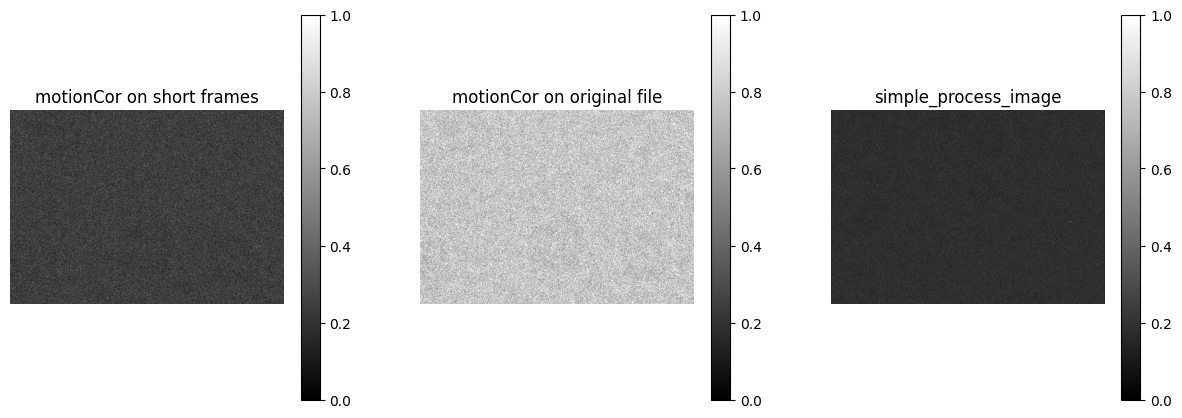

In [111]:
titles = ["motionCor on short frames", "motionCor on original file", "simple_process_image"]
images = dd + tuple([simple_process_image])

images = dd + tuple([simple_process_image])


fig, axs = display_images(images, 
                          titles, 
                          num_rows=1, num_cols=len(titles))
plt.show()

# Load model

In [112]:
from srgan import SRGAN
import torch

model = SRGAN.load_from_checkpoint(
    "./../src/models/logdir/log2023-0526-062732/lightning_logs/version_0/checkpoints/epoch=2-step=35520.ckpt")

# eval mode to stop backprop
model = model.eval()


/home/kyohei/workspace/fastcryo/notebooks/../src/models/srgan.py:160: UnderReviewWarning: The feature ResidualBlock is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  res_blocks += [ResidualBlock(feature_maps)]
/home/kyohei/workspace/fastcryo/notebooks/../src/models/srgan.py:258: UnderReviewWarning: The feature SRGANDiscriminator is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.discriminator = SRGANDiscriminator(image_channels, feature_maps_disc)
/home/kyohei/workspace/fastcryo/notebooks/../src/models/srgan.py:259: Unde

In [113]:
generator = model.generator.eval()

In [114]:

x = torch.tensor(dd[0]).unsqueeze(0).unsqueeze(0) 

# ypred = generator(x)
ypred = model(x)

ypred = ypred.detach().numpy()[0]

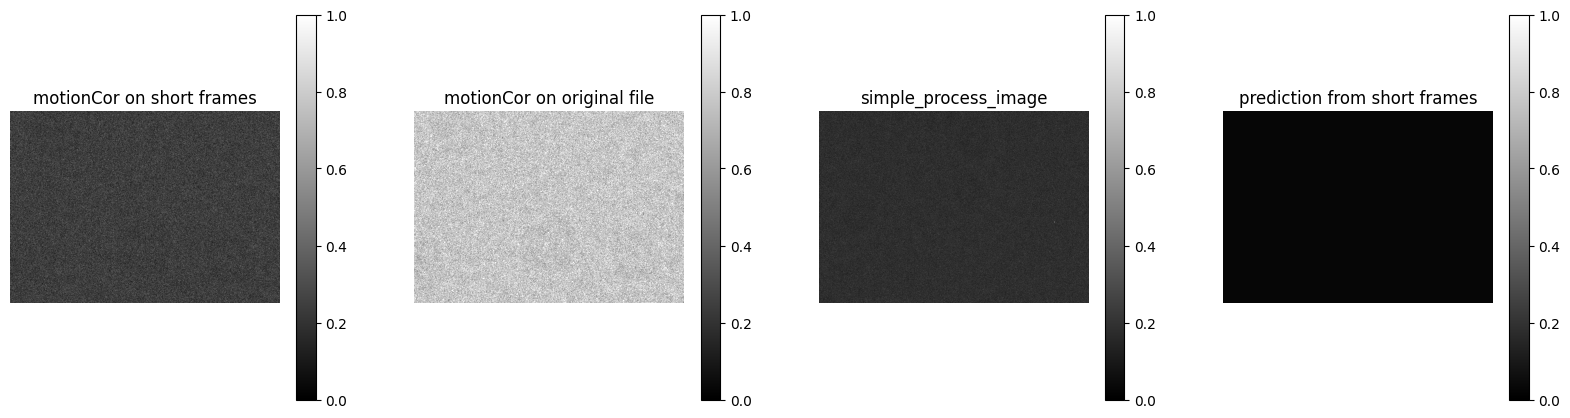

<Figure size 10000x20000 with 0 Axes>

In [118]:
# titles = ["motionCor on short frames", "motionCor on original file", ]
titles = ["motionCor on short frames", "motionCor on original file", "simple_process_image",
         "prediction from short frames"]
images = dd + tuple([simple_process_image]) + tuple(ypred)
                          
fig, axs = display_images(images, 
                          titles, num_rows=1, num_cols=len(titles))
plt.figure(figsize=(100,200))
plt.show()